## Project Runner

### I. Import packages

In [30]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_fscore_support, roc_curve, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import  DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import roc_auc_score

import torch
import torch.nn as nn

""" 
9.3% of the population in the United States have diabetes , 28%
The cost of misclassification is high

"""



' \n9.3% of the population in the United States have diabetes , 28%\nThe cost of misclassification is high\n\n'

In [37]:
#read in clean data
csv_filename = 'dataset/clean_diabetic_dataset.csv'
df = pd.read_csv(csv_filename)

X_train, X_test, y_train, y_test = train_test_split(df.drop("readmitted",axis=1),
df[["readmitted"]],test_size=0.2, shuffle=True,random_state=12345)

y_train = y_train.to_numpy().reshape(-1)
y_test = y_test.to_numpy().reshape(-1)

In [32]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', None)
# pd.reset_option('display.max_columns')
# pd.reset_option('display.max_rows')
# pd.reset_option('display.width')

### II. Data Cleanning and Setup

In [5]:
# Copy code from cleaner.ipynb 
# OR import clean .csv produced from cleaner

# Split data into trainning-validation-test

### III. Trainning

In [7]:
# Implement ML classifiers

# May include experiments of tunning hyperparameters

In [15]:
#visualize
def plot_count(colName,xLabel,title):
    # Count the number of occurrences for each unique value in colName
    value_counts = df[colName].value_counts()
    
    # Create a bar graph using matplotlib
    plt.bar(value_counts.index,value_counts.values)
    
    # Set labels and title for the graph
    plt.xlabel(xLabel)
    plt.ylabel('Count')
    plt.title(title)

    # Display the graph
    plt.show()
    

0        0
1        1
2        0
3        0
4        0
        ..
70429    0
70430    0
70431    0
70432    0
70433    1
Name: readmitted, Length: 70434, dtype: int64


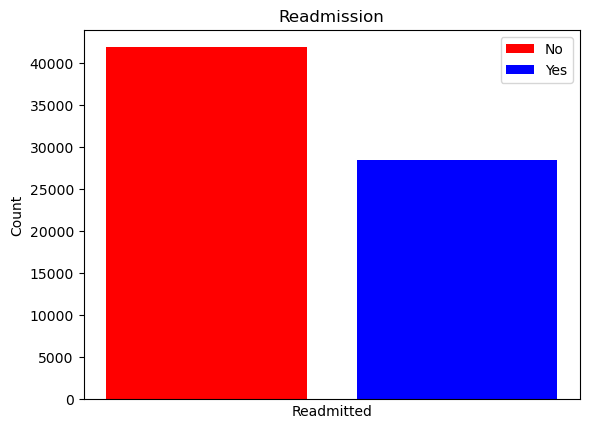

In [39]:
#bar graph for readmission

# Define the x and y data
# y = [0,0,0,0,1,2,1,2]


# Count the occurrences for each unique value
unique_values, counts = np.unique(df['readmitted'], return_counts=True)


x_labels = ['No', 'Yes']

colors = ['red', 'blue']

bars = plt.bar(x_labels, counts,color=colors,label=x_labels)

#remove the text bellow each bar
plt.xticks([])

    
# Set labels and title for the graph
plt.xlabel('Readmitted')
plt.ylabel('Count')
plt.title('Readmission')


# Create a legend for the bars

plt.legend()

# Display the graph
plt.show()

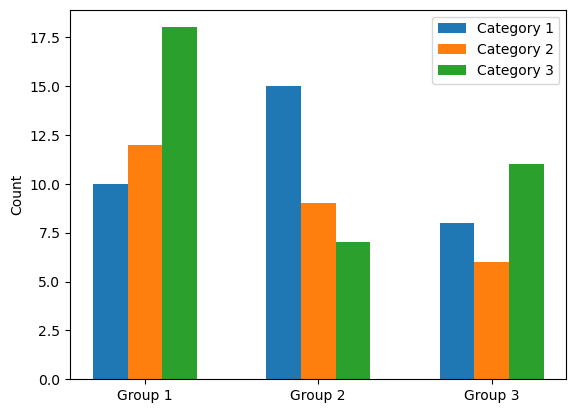

In [13]:
# Sample data
categories = ['Category 1', 'Category 2', 'Category 3']
group_names = ['Group 1', 'Group 2', 'Group 3']
counts = np.array([[10, 15, 8],
                   [12, 9, 6],
                   [18, 7, 11]])

# Determine the width of each bar and the positions of the groups
bar_width = 0.2
group_positions = np.arange(len(group_names))

# Plot the bars for each category
for i, category in enumerate(categories):
    bar_positions = group_positions + (i * bar_width)
    plt.bar(bar_positions, counts[i], width=bar_width, label=category)

# Set the x-axis tick positions and labels
plt.xticks(group_positions + bar_width * (len(categories) - 1) / 2, group_names)

# Set the y-axis label
plt.ylabel('Count')

# Add a legend
plt.legend()

# Show the plot
plt.show()


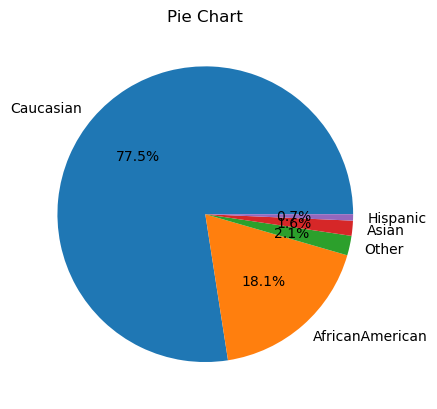

In [38]:
category_counts = df['race'].value_counts()
proportions = category_counts / len(df)
labels = ['Caucasian' ,'AfricanAmerican' ,'Other', 'Asian', 'Hispanic']
explode = (0, 0, 0, 0,0)  # To highlight a slice, you can use the explode parameter

# Plot the pie chart
plt.pie(proportions, explode=explode, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title('Pie Chart')

# Show the plot
plt.show()



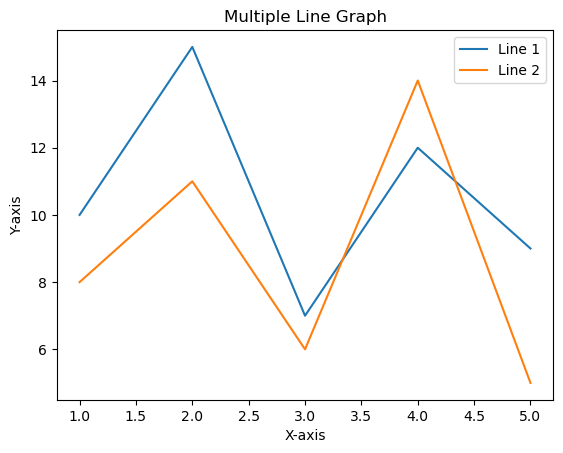

In [18]:
# Sample data
x = [1, 2, 3, 4, 5]
y1 = [10, 15, 7, 12, 9]
y2 = [8, 11, 6, 14, 5]

# Plot the lines
plt.plot(x, y1, label='Line 1')
plt.plot(x, y2, label='Line 2')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Multiple Line Graph')

# Add a legend
plt.legend()

# Show the plot
plt.show()


knn

ValueError: n_features must be equal to 2. Got 46 instead.

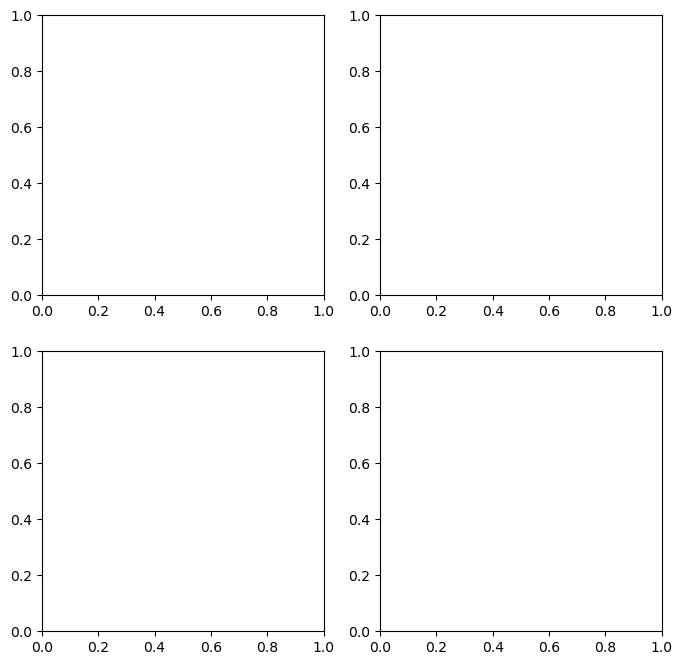

In [42]:
#code from hw2

# Some keyword arguments for making nice looking plots.
# Feel free to change grid_resolution to a higher number -- this results in better looking plots,
# but may result in your code running more slowly.
plot_kwargs = {'cmap': 'viridis',
               'response_method': 'predict',
               'plot_method': 'pcolormesh',
               'shading': 'auto',
               'alpha': 0.5,
               'grid_resolution': 100}

figure, axes = plt.subplots(2, 2, figsize=(8, 8))

X_train, X_test, y_train, y_test

for i,k in enumerate([1,5,10,50]):
    x =  i%2
    y =  i//2 
    knnClassifier = KNeighborsClassifier(n_neighbors = k)
    knnClassifier.fit(X_train,y_train)
    DecisionBoundaryDisplay.from_estimator(knnClassifier,
                                X_train,ax = axes[x,y],**plot_kwargs)
    le = LabelEncoder()
    le.fit(y_train)
    axes[x,y].scatter(X_train,
                      y_train,
        c = le.transform(y_train,cmap = 'viridis'))

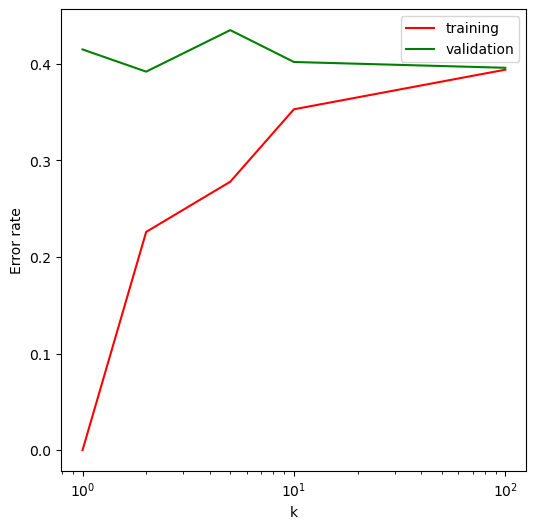

In [42]:
# tuning hyperparameter k
figure, axes = plt.subplots(1, figsize=(6, 6))
### YOUR CODE STARTS HERE ###
training = []
validation = []

for i,k in enumerate([1,2,5,10]):
    knnClassifier = KNeighborsClassifier(n_neighbors = k)
    knnClassifier.fit(X_train,y_train)
    y_pred = knnClassifier.predict(X_train[:1000])
    training.append(1-accuracy_score(y_pred,y_train[:1000]))
    
    y_pred = knnClassifier.predict(X_test[:1000])
    validation.append(1-accuracy_score(y_pred,y_test[:1000]))

axes.set_xscale('log')
axes.set_xlabel("k")
axes.set_ylabel("Error rate")
axes.plot([1,2,5,10],training,'red',label = "training")
axes.plot([1,2,5,10],validation,'green',label = "validation")
axes.legend()

        
### YOUR CODE ENDS HERE ###

logistic

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

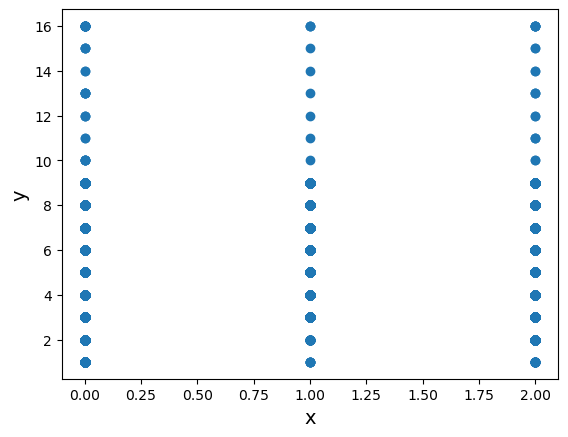

In [48]:
def plot_data(x, y):
    # Make a figure with 1 subplot
    fig, axes = plt.subplots()

    axes.scatter(x, y)

    axes.set_xlabel('x', fontsize=14)
    axes.set_ylabel('y', fontsize=14)
    
    
    return fig, axes

plot_data(df["readmitted"],df["number_diagnoses"])

In [43]:
# TODO tune parameters
lr = LogisticRegression(penalty = 'l1',solver = 'liblinear',fit_intercept = True,random_state=12345)
lr.fit(X_train,y_train)

test_predictions = lr.predict(X_train)
test_accuracy =  accuracy_score(y_train,test_predictions)
print(test_accuracy)

test_predictions = lr.predict(X_test)
test_accuracy =  accuracy_score(y_test,test_predictions)
print(test_accuracy)

0.6215947610343053
0.627173990203734


In [61]:
#neural network
torch.manual_seed(12345)

# Split the training and validation sets (70% training, 15% validation)
# X_train, X_test, y_train, y_test = 
# train_test_split(df.drop("readmitted",axis=1), test_size=0.15, random_state=12345)


# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=12345)

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train)
# X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
# y_val_tensor = torch.tensor(y_val)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test)

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        
        out = self.fc2(out)
        return out

# hyperparameters
input_size = 30  # Number of features in the input
hidden_size = 60 # Number of units in the hidden layer
num_classes = 2  # Number of output classes
num_epochs = 100
learning_rate = 0.1

# Create an instance of the neural network
model = NeuralNet(input_size, hidden_size, num_classes)

# Print the model architecture
print(model)

# Initialize the loss function
criterion = nn.CrossEntropyLoss()

# Initialize the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor )
    loss = criterion(outputs, y_train_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
    if (epoch + 1) % 1 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Make predictions
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs.data, 1)

# Calculate accuracy
accuracy = (predicted == y_test_tensor).sum().item() / len(y_test)




print(f'Test Accuracy: {accuracy:.4f}')


NeuralNet(
  (fc1): Linear(in_features=30, out_features=60, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=60, out_features=2, bias=True)
)
Epoch [1/100], Loss: 1.5111
Epoch [2/100], Loss: 156.4549
Epoch [3/100], Loss: 0.6951
Epoch [4/100], Loss: 0.6930
Epoch [5/100], Loss: 0.6912
Epoch [6/100], Loss: 0.6896
Epoch [7/100], Loss: 0.6881
Epoch [8/100], Loss: 0.6868
Epoch [9/100], Loss: 0.6856
Epoch [10/100], Loss: 0.6846
Epoch [11/100], Loss: 0.6836
Epoch [12/100], Loss: 0.6828
Epoch [13/100], Loss: 0.6820
Epoch [14/100], Loss: 0.6813
Epoch [15/100], Loss: 0.6807
Epoch [16/100], Loss: 0.6801
Epoch [17/100], Loss: 0.6796
Epoch [18/100], Loss: 0.6791
Epoch [19/100], Loss: 0.6787
Epoch [20/100], Loss: 0.6783
Epoch [21/100], Loss: 0.6780
Epoch [22/100], Loss: 0.6777
Epoch [23/100], Loss: 0.6775
Epoch [24/100], Loss: 0.6772
Epoch [25/100], Loss: 0.6770
Epoch [26/100], Loss: 0.6768
Epoch [27/100], Loss: 0.6767
Epoch [28/100], Loss: 0.6765
Epoch [29/100], Loss: 0.6764
Epoch [30/100], L

### IV. Testing and Graph